# Homework 21 Confident intervals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$

In [2]:
### Ваши код/вычесления...
sigma = 15
Z = 1.96  # 95%
Delta = 3 #%

n = ((sigma * Z)/Delta)**2
n

96.03999999999998

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [3]:
### Ваш код...
X = 130
n = 25
sigma = 12 # скажем спасибо достоверным источникам
Z = 2.33 # 98%

D = sigma*Z/(n**0.5)
X-D, X, X+D

(124.408, 130, 135.592)

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [4]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
t , p  = stats.ttest_ind(population_men,population_women)
t,p
# p-value больше уровня значимости 0.001 => принимаем нулевую гипотезу 
# т.е. различия между выборками статистически не значимы

(2.5897848244002772, 0.00960360662828964)

(array([   5.,   10.,   36.,   88.,  232.,  467.,  798., 1218., 1616.,
        1845., 1764., 1524., 1068.,  669.,  394.,  170.,   65.,   20.,
           9.,    2.]),
 array([-615.1977555 , -551.11263387, -487.02751224, -422.9423906 ,
        -358.85726897, -294.77214734, -230.68702571, -166.60190407,
        -102.51678244,  -38.43166081,   25.65346083,   89.73858246,
         153.82370409,  217.90882572,  281.99394736,  346.07906899,
         410.16419062,  474.24931225,  538.33443389,  602.41955552,
         666.50467715]),
 <a list of 20 Patch objects>)

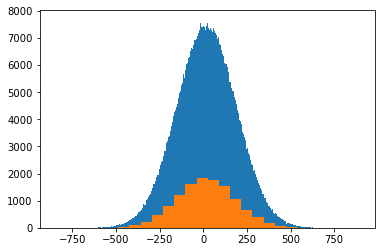

In [5]:
# В силу большой разницы в размерности выборок получить хорошую визуализацию проблематично;
# можно поэскпериментировать с числом интервалов группирования, например
plt.hist(population_men, bins=6000)
plt.hist(population_women, bins=20)

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

Воспользуемся известным соотношением:
$$ n = (\frac{Z*\sigma}{\Delta})^2$$

In [6]:
### Ваш код...
sigma = 150
D = 50
Z = 1.96 # alpha 0.05

n = ((Z*sigma)/D)**2
n
# 34 человека и один ребенок :)

34.5744

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [7]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [8]:
oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция
oddsratio, pvalue

# при вычислении критерия Фишера получаем значение p-value 0.35, значительно превосходящее уровень значимости 0.05
# таким образом, нулевая гипотеза не может быть отвергнута, совпадения случайны

(0.5811965811965812, 0.35417955365927367)

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [9]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h, h

print(mean_confidence_interval(data, 0.9))

(6.074074746111319, 6.628571428571429, 7.183068111031539, 0.55449668246011)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [10]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:
# воспользуемя двухвыборочным t-тестом

stats.ttest_ind(data_1, data_2, equal_var = False)
# тест возвращает p-value=2.5e-9, что значительно меньше любого из используемых уровней значимости;
# соответственно, мы отвергаем нулевую гипотезу и заключаем, что выборки принадлежат различным множествам

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

(array([ 3.,  0.,  6.,  0.,  0.,  8.,  0., 18.,  0.,  0., 23.,  0., 19.,
         0.,  0.,  9.,  0.,  4.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <a list of 20 Patch objects>)

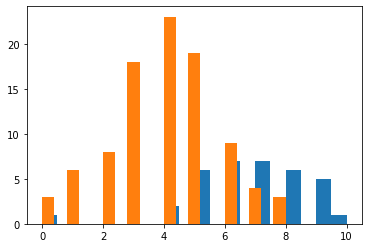

In [11]:
# проиллюстрируем с помощью гистограмм
plt.hist(data_1, bins=20)
plt.hist(data_2, bins=20)

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:
# Нулевая и альтернативная гипотезы сформулированы относительно генеральной совокупности, в то время как тест применен
# к каким-то абстрактным объектам. Соответственно, интерпретировать результаты такого теста можно лишь в разрезе
# таких объектов. Таким образом, ответ нет, мы не считаем распределение нормальным (исходя из кривой плотности вероятности)

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [12]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

### Ваш код:
# воспользуемя двухвыборочным t-тестом, equal_var True в силу одинакового размера выборок
stats.ttest_ind(A, B)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995194857529052)

In [ ]:
# Полученное значение p-value=0.05995 не позволяет отвергнуть нулевую гипотезу на уровне значимости 0,05
# => делаем вывод о том, что различия статистически не значимы, т.е. являются случайными
# Различия были бы значимы при p<=0.05

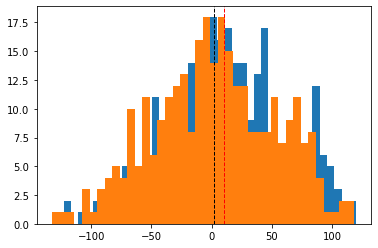

In [13]:
plt.hist(A, bins = 40)
plt.hist(B, bins = 40)
plt.axvline(A.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(B.mean(), color='k', linestyle='dashed', linewidth=1)
# можно видеть, что средние выборок немного смещены относительно друг друга